In [1]:
# Import the packages that you want to use
import xarray as xr
import numpy as np


In [2]:
# Specify the path to the data on flyingfish
rootdir = '/local/ss23/GFDL_LEs/'
# Specify which experiment you want to look at
experiment = 'RCP85'
# Specify the file name
filename = 'sst.1.rcp85.remap.1950_2100.nc'
# The combination of these defines the path
path = rootdir+experiment+'/'+filename

# Load the file using xarray
ds = xr.open_dataset(path)

### Selecting datasets which span across the prime meridian

In [21]:
lon_west = ds['xt_ocean'].where(ds['xt_ocean']>300,drop=True)
lon_east = ds['xt_ocean'].where(ds['xt_ocean']<50,drop=True)
lon_europe = xr.concat((lon_west,lon_east),dim='xt_ocean').values
ds_europe = ds.sel(xt_ocean=lon_europe)

In [22]:
ds_europe

<xarray.Dataset>
Dimensions:        (bnds: 2, st_ocean: 1, time: 1812, xt_ocean: 110, yt_ocean: 180)
Coordinates:
  * xt_ocean       (xt_ocean) float64 300.5 301.5 302.5 303.5 ... 47.5 48.5 49.5
  * yt_ocean       (yt_ocean) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * st_ocean       (st_ocean) float64 5.0
  * time           (time) object 1950-01-16 12:00:00 ... 2100-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    xt_ocean_bnds  (xt_ocean, bnds) float64 ...
    yt_ocean_bnds  (yt_ocean, bnds) float64 ...
    temp           (time, st_ocean, yt_ocean, xt_ocean) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.0 (http://m...
    Conventions:               CF-1.6
    history:                   Mon Mar 11 13:52:13 2019: cdo -O remapbil,WOA2...
    filename:                  19500101.ocean_month.nc
    title:                     ESM2M-C1_all_historical_HC2_ens101
    grid_type:                 mosaic
    grid_tile:                 1
    NCO:                       4.0.3
    nco_openmp_thread_number:  1
    code_version:              $Name: fre-nctools-bronx-8 $
    CDO:                       Climate Data Operators version 1.9.0 (http://m...

### Use of dictionaries to label variables

In [1]:
regions = ['NorthAmerica','SouthAmerica','Oceania']

regions_latbounds = {}
regions_latbounds['NorthAmerica']=slice(10,65)
regions_latbounds['SouthAmerica']=slice(-45,10)
regions_latbounds['Oceania']=slice(-45,0)

In [2]:
regions_latbounds = {'NorthAmerica':slice(10,65),'SouthAmerica':slice(-45,10),'Oceania':slice(-45,0)}

In [3]:
regions_temp={}
for r in regions:
    print(regions_latbounds[r])
    regions_temp[r] = ds['temp'].sel(yt_ocean=regions_latbounds[r])
regions_temp

slice(10, 65, None)


NameError: name 'ds' is not defined

#### Basic use of xhistogram

In [5]:
from xhistogram.xarray import histogram as xh
rootdir = '/local/ss23/GFDL_LEs/OCN/METABOLIC_INDEX/RCP85/'
filename = 'sfc_MI_hitemp_sens_ens101_1x1_1950_2100.nc'
ds = xr.open_dataset(rootdir+filename)
area = xr.ones_like(ds['MI'].isel(time=0))

In [11]:
mi_bins = np.arange(0,30,0.2)
dist = xh(ds['MI'],bins=[mi_bins],dim=['xt_ocean','yt_ocean'],weights=area)

In [12]:
dist

<xarray.DataArray 'histogram_MI' (time: 1812, MI_bin: 149)>
array([[  0.,   0.,   0., ...,  92.,  95., 107.],
       [  0.,   0.,   0., ...,  41.,  39.,  46.],
       [  0.,   0.,   0., ...,  47.,  46.,  47.],
       ...,
       [  0.,   0.,   0., ...,  45.,  41.,  37.],
       [  0.,   0.,   0., ...,  39.,  41.,  51.],
       [  0.,   0.,   0., ...,  38.,  49.,  38.]])
Coordinates:
  * time     (time) object 1950-01-31 00:00:00 ... 2100-12-31 00:00:00
  * MI_bin   (MI_bin) float64 0.1 0.3 0.5 0.7 0.9 ... 28.9 29.1 29.3 29.5 29.7

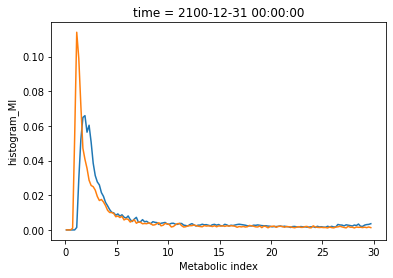

In [15]:
total = dist.sum('MI_bin')
(dist.isel(time=0)/total.isel(time=0)).plot()
(dist.isel(time=-1)/total.isel(time=-1)).plot()
# dist.isel(time=-1).plot()

 ...]

/home/aos/graemem/miniconda3/envs/esm2m/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


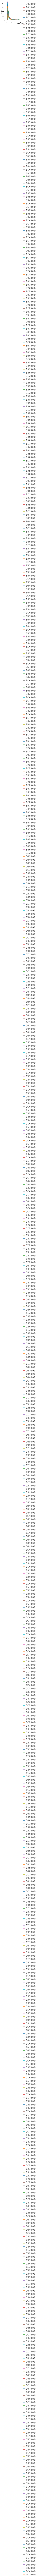

In [17]:
dist.plot(hue='time')